In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# 데이터 EDA & 전처리

## 기본 데이터 확인

In [3]:
df.shape

(119390, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## 결측치 탐색

- 대표값이나 0 혹은 다른 값으로 대체

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
print(df['children'].nunique())
print(df['children'].unique())

5
[ 0.  1.  2. 10.  3. nan]


In [7]:
df.groupby('children', as_index=False)['agent'].count().sort_values(by='agent', ascending=False)

,children,agent
0,0.0,95149
1,1.0,4411
2,2.0,3429
3,3.0,58
4,10.0,1


In [8]:
print(df['country'].nunique())
print(df['country'].unique())

177
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP'
 'GLP' 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 'FRO' 'MMR' 'PAN' 'BFA' 'LBY'
 'MLI' 'NAM' 'BOL' 'PRY' 'BRB' 'ABW' 'AIA' 'SLV' '

In [9]:
df.groupby(['country'], as_index=False)['agent'].count().sort_values(by='agent', ascending=False)

,country,agent
135,PRT,37593
59,GBR,10889
56,FRA,9810
51,ESP,7848
43,DEU,6998
...,...,...
96,LCA,1
89,KIR,1
148,SMR,0
150,STP,0


In [10]:
print(df['agent'].nunique())
print(df['agent'].unique())

333
[ nan 304. 240. 303.  15. 241.   8. 250. 115.   5. 175. 134. 156. 243.
 242.   3. 105.  40. 147. 306. 184.  96.   2. 127.  95. 146.   9. 177.
   6. 143. 244. 149. 167. 300. 171. 305.  67. 196. 152. 142. 261. 104.
  36.  26.  29. 258. 110.  71. 181.  88. 251. 275.  69. 248. 208. 256.
 314. 126. 281. 273. 253. 185. 330. 334. 328. 326. 321. 324. 313.  38.
 155.  68. 335. 308. 332.  94. 348. 310. 339. 375.  66. 327. 387. 298.
  91. 245. 385. 257. 393. 168. 405. 249. 315.  75. 128. 307.  11. 436.
   1. 201. 183. 223. 368. 336. 291. 464. 411. 481.  10. 154. 468. 410.
 390. 440. 495. 492. 493. 434.  57. 531. 420. 483. 526. 472. 429.  16.
 446.  34.  78. 139. 252. 270.  47. 114. 301. 193. 182. 135. 350. 195.
 352. 355. 159. 363. 384. 360. 331. 367.  64. 406. 163. 414. 333. 427.
 431. 430. 426. 438. 433. 418. 441. 282. 432.  72. 450. 180. 454. 455.
  59. 451. 254. 358. 469. 165. 467. 510. 337. 476. 502. 527. 479. 508.
 535. 302. 497. 187.  13.   7.  27.  14.  22.  17.  28.  42.  20.  19.
  

In [11]:
df[df['agent']==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [12]:
df[df['agent']==2]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
182,Resort Hotel,0,258,2015,July,28,6,2,5,2,...,No Deposit,2.0,NaN,0,Contract,47.25,0,0,Check-Out,2015-07-13
208,Resort Hotel,1,292,2015,July,28,7,2,5,2,...,No Deposit,2.0,NaN,0,Contract,47.25,0,0,Canceled,2015-03-25
836,Resort Hotel,0,286,2015,July,31,31,2,2,1,...,No Deposit,2.0,NaN,0,Transient,57.60,0,0,Check-Out,2015-08-04
1608,Resort Hotel,0,356,2015,September,36,5,4,10,2,...,No Deposit,2.0,NaN,0,Contract,91.77,0,0,Check-Out,2015-09-19
1790,Resort Hotel,0,135,2015,September,38,14,8,20,2,...,No Deposit,2.0,NaN,0,Contract,82.00,0,0,Check-Out,2015-10-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109859,City Hotel,0,177,2017,April,15,15,2,1,2,...,No Deposit,2.0,NaN,0,Transient-Party,105.33,0,1,Check-Out,2017-04-18
109860,City Hotel,0,177,2017,April,15,15,2,1,2,...,No Deposit,2.0,NaN,0,Transient-Party,105.33,0,1,Check-Out,2017-04-18
109861,City Hotel,0,177,2017,April,15,15,2,1,2,...,No Deposit,2.0,NaN,0,Transient-Party,105.33,0,1,Check-Out,2017-04-18
111393,City Hotel,0,60,2017,May,19,7,2,1,2,...,No Deposit,2.0,NaN,0,Transient,106.00,0,0,Check-Out,2017-05-10


In [13]:
print(df['company'].nunique())
print(df['company'].unique())

352
[ nan 110. 113. 270. 178. 240. 154. 144. 307. 268.  59. 204. 312. 318.
  94. 174. 274. 195. 223. 317. 281. 118.  53. 286.  12.  47. 324. 342.
 373. 371. 383.  86.  82. 218.  88.  31. 397. 392. 405. 331. 367.  20.
  83. 416.  51. 395. 102.  34.  84. 360. 394. 457. 382. 461. 478. 386.
 112. 486. 421.   9. 308. 135. 224. 504. 269. 356. 498. 390. 513. 203.
 263. 477. 521. 169. 515. 445. 337. 251. 428. 292. 388. 130. 250. 355.
 254. 543. 531. 528.  62. 120.  42.  81. 116. 530. 103.  39.  16.  92.
  61. 501. 165. 291. 290.  43. 325. 192. 108. 200. 465. 287. 297. 490.
 482. 207. 282. 437. 225. 329. 272.  28.  77. 338.  72. 246. 319. 146.
 159. 380. 323. 511. 407. 278.  80. 403. 399.  14. 137. 343. 346. 347.
 349. 289. 351. 353.  54.  99. 358. 361. 362. 366. 372. 365. 277. 109.
 377. 379.  22. 378. 330. 364. 401. 232. 255. 384. 167. 212. 514. 391.
 400. 376. 402. 396. 302. 398.   6. 370. 369. 409. 168. 104. 408. 413.
 148.  10. 333. 419. 415. 424. 425. 423. 422. 435. 439. 442. 448. 443.
 4

In [14]:
df[df['company']==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [15]:
df[df['company']==9]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
9713,Resort Hotel,1,12,2016,December,53,28,0,1,1,...,No Deposit,NaN,9.0,0,Transient,30.00,0,0,Canceled,2016-12-27
13963,Resort Hotel,0,0,2016,February,6,2,0,2,1,...,No Deposit,NaN,9.0,0,Transient,30.00,0,0,Check-Out,2016-02-04
13964,Resort Hotel,0,6,2017,January,4,24,0,2,1,...,No Deposit,NaN,9.0,0,Transient,35.00,0,1,Check-Out,2017-01-26
14306,Resort Hotel,0,1,2015,December,51,15,0,3,1,...,No Deposit,NaN,9.0,0,Transient,35.00,0,0,Check-Out,2015-12-18
14307,Resort Hotel,0,1,2016,February,6,2,0,2,1,...,No Deposit,NaN,9.0,0,Transient,30.00,0,0,Check-Out,2016-02-04
14308,Resort Hotel,0,3,2016,April,15,4,1,0,1,...,No Deposit,NaN,9.0,0,Transient,42.00,0,0,Check-Out,2016-04-05
14309,Resort Hotel,0,5,2016,June,26,21,0,2,1,...,No Deposit,NaN,9.0,0,Transient,65.00,0,0,Check-Out,2016-06-23
14310,Resort Hotel,0,6,2016,October,43,18,0,2,1,...,No Deposit,NaN,9.0,0,Transient,54.00,0,0,Check-Out,2016-10-20
14311,Resort Hotel,0,3,2016,December,51,12,1,2,1,...,No Deposit,NaN,9.0,0,Transient,30.00,0,0,Check-Out,2016-12-15
14312,Resort Hotel,0,6,2017,January,4,24,0,2,1,...,No Deposit,NaN,9.0,0,Transient,35.00,0,0,Check-Out,2017-01-26


In [16]:
# 결측치 대체
df['children'].fillna(0, inplace=True)
df['country'].fillna('none', inplace=True)
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

In [17]:
df.isnull().sum().sum()

0

## 이상치 탐색 및 클래스 불균형

In [18]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [19]:
(df.describe() < 0).sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
days_in_waiting_list              0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [20]:
len(df[df['adr'] < 0])

1

In [21]:
df.shape

(119390, 32)

In [22]:
df['adr'].nunique()

8879

In [23]:
df = df[df['adr'] >= 0]

In [24]:
df.shape

(119389, 32)

- 어디에 중점을 둘 것인지 정해야 한다.
    - 정상/취소/노쇼 각각 분리할 것인지 <= 선택 : 업샘플링 혹은 다운 샘플링 진행
    - 정상/취소 + 노쇼 binary 분류를 할 것인지 <= 선택 : 적절한 배분으로 클래스 불균형이 해소 될 것으로 판단

In [25]:
df['reservation_status'].value_counts()

Check-Out    75165
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [26]:
# 정상 비율
df['reservation_status'].value_counts()[0] / df['reservation_status'].value_counts().sum() * 100

62.95806146294885

In [27]:
# 취소 비율
df['reservation_status'].value_counts()[1] / df['reservation_status'].value_counts().sum() * 100

36.03095762591194

In [28]:
# 노쇼 비율
df['reservation_status'].value_counts()[2] / df['reservation_status'].value_counts().sum() * 100

1.0109809111392172

## 객실별 수요 파악

- 년/월 별

In [29]:
df['arrival_date_year'].value_counts()

2016    56707
2017    40686
2015    21996
Name: arrival_date_year, dtype: int64

In [30]:
df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9793
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [31]:
df.groupby(['arrival_date_year', 'arrival_date_month'], as_index=False)['agent'].count()

,arrival_date_year,arrival_date_month,agent
0,2015,August,3889
1,2015,December,2920
2,2015,July,2776
3,2015,November,2340
4,2015,October,4957
5,2015,September,5114
6,2016,April,5428
7,2016,August,5063
8,2016,December,3860
9,2016,February,3891


In [32]:
to_dicts = {'January' : '01.January',
            'February' : '02.February',
            'March' : '03.March',
            'April' : '04.April',
            'May' : '05.May',
            'June' : '06.June',
            'July' : '07.July',
            'August' : '08.August',
            'September' : '09.September',
            'October' : '10.October',
            'November' : '11.November',
            'December' : '12.December'}

In [33]:
df_res = df.groupby(['arrival_date_year', 'arrival_date_month'], as_index=False)['agent'].count()
df_res = df_res.replace(to_dicts)
df_res.sort_values(by=['arrival_date_year', 'arrival_date_month'])

,arrival_date_year,arrival_date_month,agent
2,2015,07.July,2776
0,2015,08.August,3889
5,2015,09.September,5114
4,2015,10.October,4957
3,2015,11.November,2340
1,2015,12.December,2920
10,2016,01.January,2248
9,2016,02.February,3891
13,2016,03.March,4824
6,2016,04.April,5428


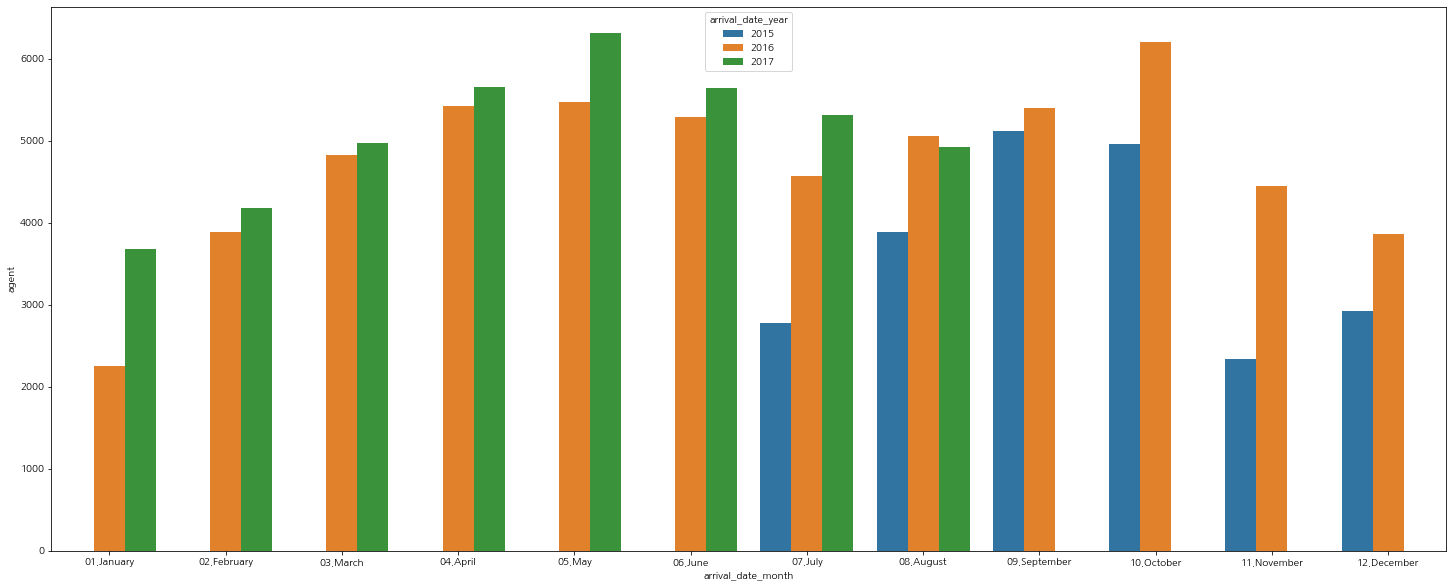

In [34]:
plt.figure(figsize=(25, 10))
sns.barplot(data=df_res, x='arrival_date_month', y='agent', hue='arrival_date_year', order=['01.January', '02.February', '03.March', '04.April', '05.May', '06.June', '07.July', '08.August', '09.September', '10.October', '11.November', '12.December'])
plt.show()

## 클래스 별 탐색

In [35]:
# 클래스 비율
df['reservation_status'].value_counts()

Check-Out    75165
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [36]:
# 취소와 노쇼에 대한 데이터 1로 변경
import numpy as np
df['reservation_status'] = np.where(df['reservation_status'] != 'Check-Out', 1, 0)
df['reservation_status'].value_counts()

0    75165
1    44224
Name: reservation_status, dtype: int64

In [37]:
# 비율 : 37%로 취소 또는 노쇼 고객 비율
df['reservation_status'].value_counts()[1] / df['reservation_status'].value_counts().sum() * 100

37.04193853705115

### 클래스 별 특성

- 월

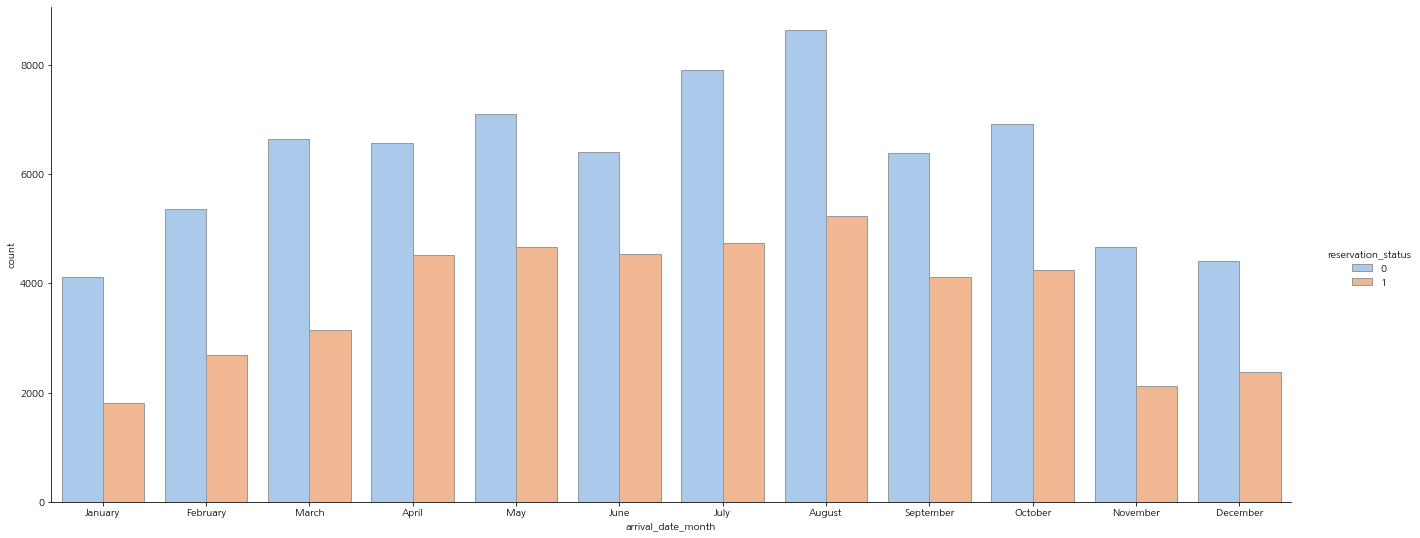

In [38]:
sns.catplot(x="arrival_date_month", hue="reservation_status", kind="count",palette="pastel", edgecolor=".6",data=df, aspect=3,
            order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.gcf().set_size_inches(20, 8)
plt.show()

In [39]:
# 월에 따른 취소/노쇼율 비교
df_gp = df.groupby('arrival_date_month')['reservation_status'].agg(['count','sum']).reset_index()
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp['arrival_date_month'].replace(to_dicts, inplace=True)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,arrival_date_month,count,sum,ratio
6,06.June,10939,4535,41.5
0,04.April,11089,4524,40.8
8,05.May,11791,4677,39.7
11,09.September,10508,4116,39.2
10,10.October,11160,4246,38.0
1,08.August,13877,5239,37.8
5,07.July,12661,4742,37.5
2,12.December,6780,2371,35.0
3,02.February,8068,2696,33.4
7,03.March,9793,3149,32.2


- 호텔 별

In [40]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40059
Name: hotel, dtype: int64

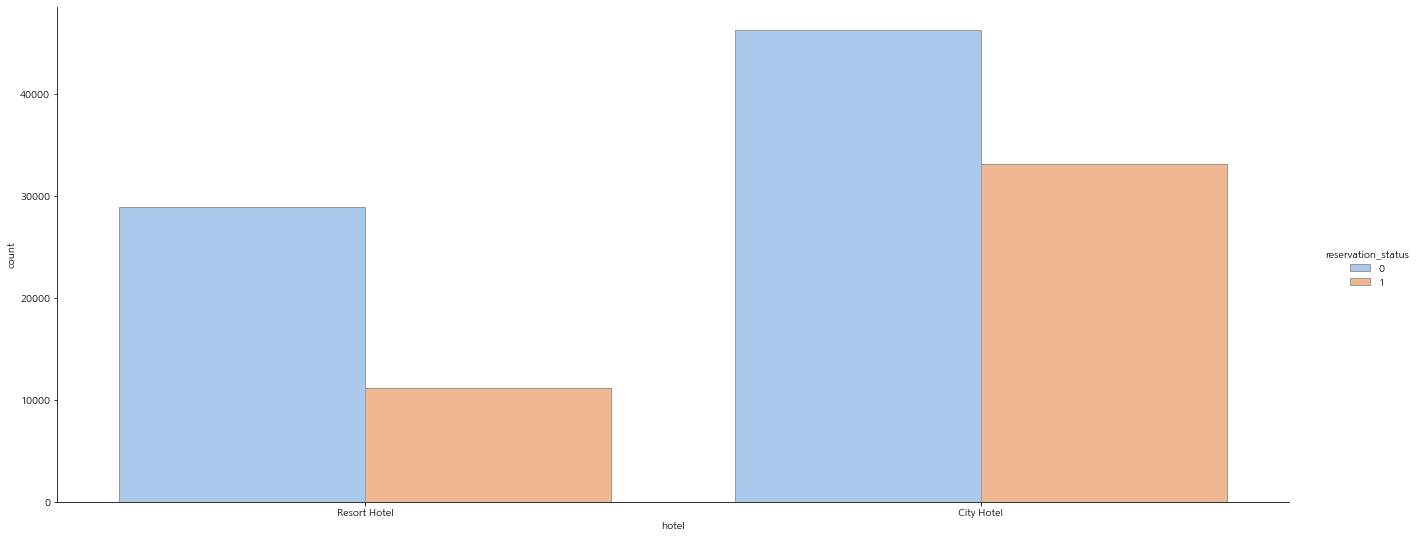

In [41]:
# Resort Hottel과 City Hotel 비교
sns.catplot(x="hotel", hue="reservation_status", kind="count",palette="pastel", edgecolor=".6",data=df, aspect=3)
plt.gcf().set_size_inches(20, 8)
plt.show()

In [42]:
# Resort Hotle과 City Hotel 비교
df_gp = df.groupby('hotel')['reservation_status'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
hotel,,,
City Hotel,79330,33102,41.7
Resort Hotel,40059,11122,27.8


- 주말 예약

In [43]:
df['stays_in_weekend_nights'].unique()

array([ 0,  1,  2,  4,  3,  6, 13,  8,  5,  7, 12,  9, 16, 18, 19, 10, 14],
      dtype=int64)

In [44]:
df['stays_in_weekend_nights'].value_counts()

0     51998
2     33308
1     30626
4      1854
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

In [45]:
df['stays_in_weekend_nights'].value_counts()[0] / df['stays_in_weekend_nights'].value_counts().sum() * 100

43.553426195043095

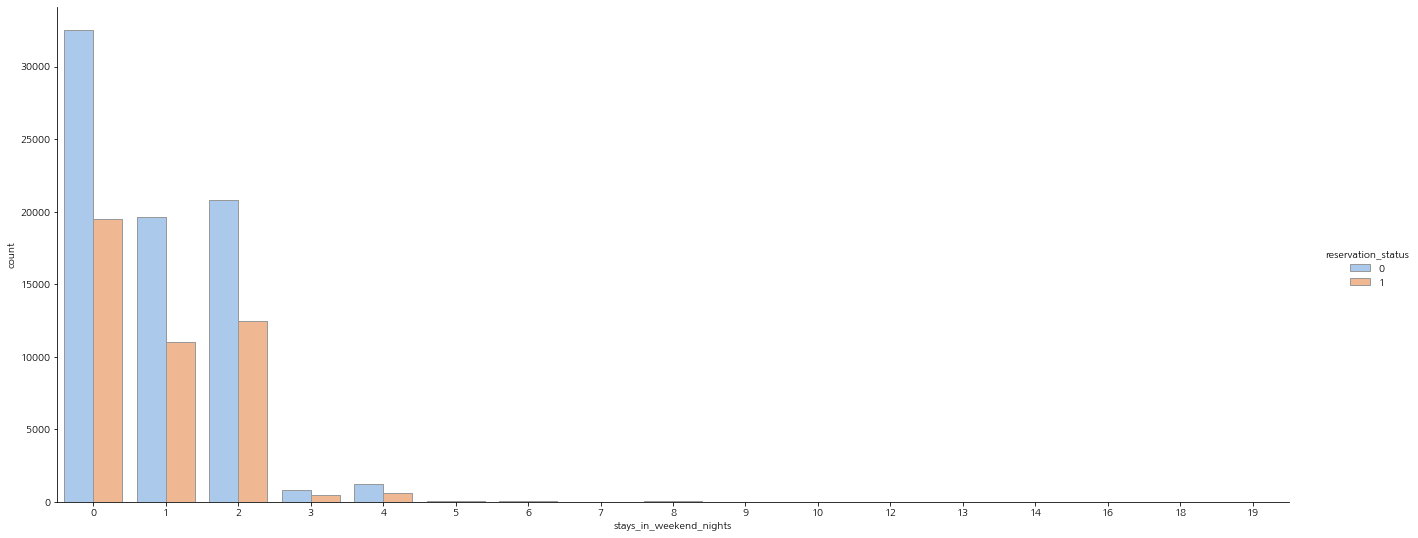

In [46]:
# 주말 예약 일수에 따른 비교
sns.catplot(x="stays_in_weekend_nights", hue="reservation_status", kind="count", palette="pastel", edgecolor=".6", data=df, aspect=3)
plt.gcf().set_size_inches(20, 8)
plt.show()

In [47]:
# 주말 예약 일수에 따른 비교
df_gp = df.groupby('stays_in_weekend_nights')['reservation_status'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
stays_in_weekend_nights,,,
7,19,14,73.7
9,11,7,63.6
6,153,87,56.9
8,60,34,56.7
5,79,43,54.4
0,51998,19501,37.5
2,33308,12485,37.5
1,30626,11007,35.9
3,1259,444,35.3


In [48]:
# 주말 예약 일수에 따른 비교(re-binning)
df_c = df.copy()

df_c['gp'] = np.where(df_c['stays_in_weekend_nights'] == 0, 0, np.where(df_c['stays_in_weekend_nights'] <= 2, 1, 2))

df_gp = df_c.groupby('gp')['reservation_status'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
gp,,,
0,51998,19501,37.5
1,63934,23492,36.7
2,3457,1231,35.6


- 객실 타입 별

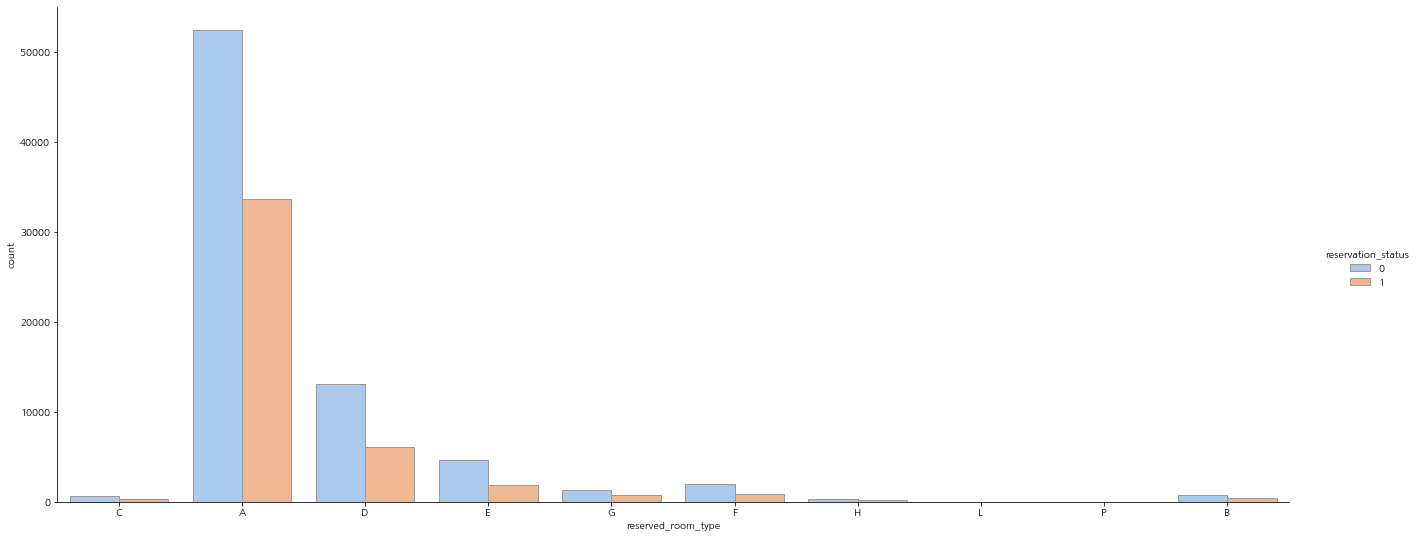

In [49]:
sns.catplot(x="reserved_room_type", hue="reservation_status", kind="count",palette="pastel", edgecolor=".6",data=df, aspect=3)
plt.gcf().set_size_inches(20, 8)
plt.show()

In [50]:
# 객실타입에 따른 비교 : P타입은 뭐길래 모두 취소/노쇼일까?
# A, H의 타입의 취소/노쇼 확률이 상대적으로 높아보인다.
df_gp = df.groupby('reserved_room_type')['reservation_status'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
reserved_room_type,,,
P,12,12,100.0
H,601,245,40.8
A,85993,33630,39.1
G,2094,763,36.4
L,6,2,33.3
C,932,308,33.0
B,1118,368,32.9
D,19201,6102,31.8
F,2897,880,30.4


In [51]:
# 위의 P 타입은 건수가 적어 유의미한 특징이라고 보기엔 애매한 부분이 있다.
# A 타입일 때 조금 신경을 써야할 수도.
df['reserved_room_type'].value_counts()

A    85993
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

- lead time 별

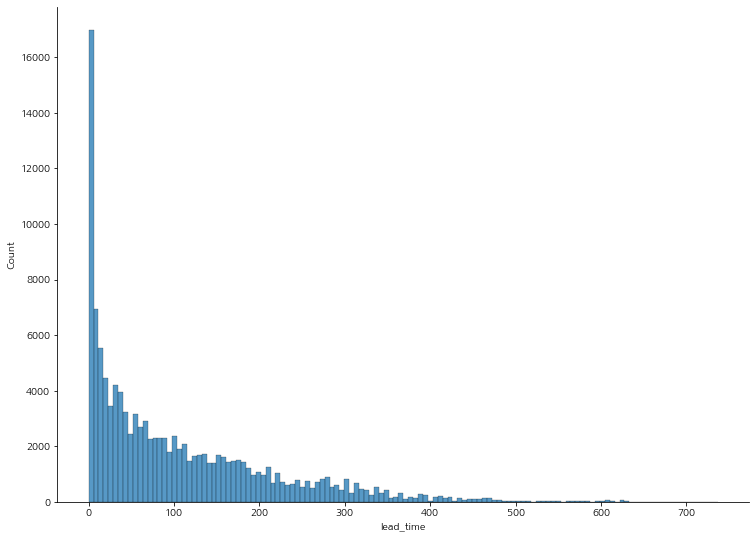

In [52]:
sns.displot(df['lead_time'])
plt.gcf().set_size_inches(12, 8)
plt.show()

In [53]:
# lead time 구간화
df_c = df.copy()
df_c['gp'] = np.where(df['lead_time'] <= 10, 1, np.where(df['lead_time']<=50, 2, np.where(df['lead_time']<=100, 3, np.where(df['lead_time']<=200, 4, np.where(df['lead_time']<=300, 2, 5)))))

df_gp = df_c.groupby('gp')['reservation_status'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
gp,,,
5,7887,5410,68.6
4,26712,12005,44.9
3,21222,8542,40.3
2,40716,15701,38.6
1,22852,2566,11.2


- 수치형 변수화

In [56]:
from sklearn.preprocessing import LabelEncoder as LE

In [57]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,0,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,0,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,0,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,0,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,0,2015-07-03


In [58]:
num_list = []
cate_list = []

for col in df.columns:
    if df[col].dtypes == 'O':
        cate_list.append(col)
    else:
        num_list.append(col)

In [60]:
for col in cate_list:
    le = LE()
    le.fit(df[col])
    df[col] = le.transform(df[col])

In [61]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,0,0.0,0.0,0,2,0.0,0,0,0,121
1,1,0,737,2015,5,27,1,0,0,2,...,0,0.0,0.0,0,2,0.0,0,0,0,121
2,1,0,7,2015,5,27,1,0,1,1,...,0,0.0,0.0,0,2,75.0,0,0,0,122
3,1,0,13,2015,5,27,1,0,1,1,...,0,304.0,0.0,0,2,75.0,0,0,0,122
4,1,0,14,2015,5,27,1,0,2,2,...,0,240.0,0.0,0,2,98.0,0,1,0,123


In [68]:
num = []
for col in df.columns:
    if df[col].dtypes == 'O':
        num.append(col)
    print(df[col].unique())

print(f'category feature : {num}')

[1 0]
[0 1]
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 194 261 260 216
 169 209 238 215 141 189 187 223 284 21

# 모델링

In [54]:
from lightgbm import LGBMClassifier as LGBM
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn import metrics

In [71]:
X = df.drop(['is_canceled', 'reservation_status_date', 'reservation_status'], axis=1)
Y = df['reservation_status']

train_x, test_x, train_y, test_y = train_test_split(X, Y, stratify=Y)

train_x.shape, train_y.shape, test_x.shape, test_y.shape

((89541, 29), (89541,), (29848, 29), (29848,))